In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

损失函数手动实现

In [6]:
def compute_loss(X, y, theta):
    if np.ndim(theta) == 1:
        theta = theta[:, np.newaxis]

    h_x = X.dot(theta) # h=θ^T dot X=θ0*x0+θ1*x1
    # print(h_x.shape) # (97,2)x(2,1)=>(97,1)

    m = y.size # 97
    J_loss = 1./(2*m) * np.sum(np.square(h_x-y))
    return J_loss

加载数据

数据集简要数据说明：

单元变量：人口 population

target：profit

(97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]] (97, 2)
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]] (97, 1)


Text(0, 0.5, 'Profit in $10,000s')

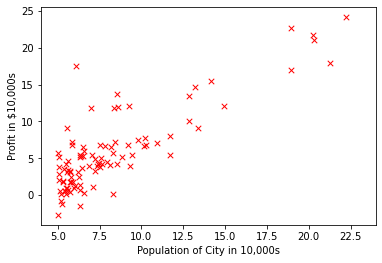

In [18]:
cwd = '/home/xijian/pycharm_projects/Magic-NLPer/MachineLearning/'
data_dir = cwd+'LinearRegression线性回归/data/'

data = np.loadtxt(data_dir + 'linear_regression_data1.txt', delimiter=',')
print(data.shape) # (97, 2)
# X0 即theta0 对应的那一列
X = np.c_[np.ones(data.shape[0]), data[:,0]]# (97,)=>(97, 2)
print(X[:5], X.shape) # (97, 1)

y = np.c_[data[:,1]] # (97,)=>(97, 1)
print(y[:5], y.shape) # (97, 1)

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

查看一下 $\theta$ =[0, 0]时的loss：

In [19]:
loss = compute_loss(X, y, [[0],[0]])
print(loss)

32.072733877455676


In [20]:
# 参数theta默认初始化为0
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1000):
    if np.ndim(theta) == 1:
        theta = theta[:, np.newaxis]

    m = y.size
    J_losses = [] # 存放每个step过程中loss，便于绘图查看loss随着优化更新的变化

    for _ in range(num_iters):
        # 计算model输出
        h_x = X.dot(theta) # (50,1)
        # print(h_x.shape)
        # 计算梯度并更新参数 X.T.dot(h_x-y):(2,50)x(50,1)=>(2,1)
        grad = 1./m * X.T.dot(h_x-y) # (2,1)
        theta = theta - alpha*grad # (2,1)
        #print(theta)
        # 计算损失
        loss = compute_loss(X, y, theta)
        J_losses.append(loss)

    return (theta, J_losses)

No handles with labels found to put in legend.


theta: [-3.63029144  1.16636235]


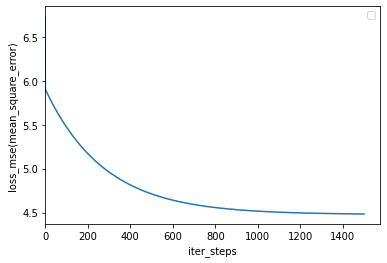

In [21]:
theta, J_losses = gradient_descent(X, y, [[0],[0]], num_iters=1500) # 参数theta默认初始化为0
print('theta:', theta.ravel()) # 拉平 (2,1)=>(2,)

plt.plot(J_losses)
plt.xlim(0)
plt.ylabel('loss_mse(mean_square_error)')
plt.xlabel('iter_steps')
plt.legend()
plt.show()

参数theta已经求出，现在画出拟合的直线：

[[1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]] (20, 2)
[[2.20152031]
 [3.36788266]
 [4.53424501]
 [5.70060736]
 [6.86696971]] (20, 1)


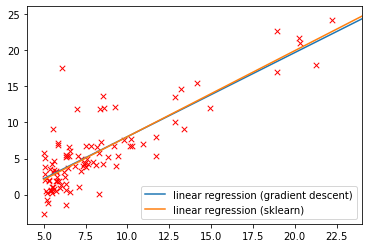

In [22]:
xx = np.arange(5, 25)
xx = np.c_[np.ones(len(xx)), xx]
print(xx[:5], xx.shape) # (20,2)
yy = xx.dot(theta) # (20,2)x(2,1)=>(20,1)
print(yy[:5], yy.shape)

# 拟合曲线
plt.plot(xx[:,1], yy, label='linear regression (gradient descent)')
# 原始数据点
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
# sklearn 库中的线性回归模型拟合的曲线（与自己实现的对比）
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel()) # X[:,1]的shape为(97,),reshape=>(97,1), y (97,1)=>拉平(97,)
yy_regr = regr.intercept_ + regr.coef_*xx[:,1]
plt.plot(xx[:,1], yy_regr, label='linear regression (sklearn)')

plt.xlim(4,24)
plt.legend(loc=4)
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures

X = np.random.randn(100,2)
print(X.shape)
poly = PolynomialFeatures(6) # 最高次项为6次
XX = poly.fit_transform(X) # X是有2个特征，XX有28个特征（含组合特征）
print(XX.shape) # (118, 28)
# 0次项：1个，1次项：2个，2次项：3个（x1^2,x2^2,x1x2），3次项：4个
# 4次项：5个，5次项：6个，6次项：7个，一共28个特征


(100, 2)
(100, 28)
